In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("final-dataset.csv")
data.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_TYPE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,...,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED,PKT_CLASS
0,3.00,24.30,389693,21,23,tcp,1540,4,11339,16091,...,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920,Normal
1,15.00,24.15,201196,23,24,tcp,1540,16,6274,16092,...,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211,Normal
2,24.15,15.00,61905,23,22,ack,55,16,1930,16092,...,328.206042,18051.3,55.0,0.008441,0.0,7.039952,7.069962,1.030045,50.060221,UDP-Flood
3,24.90,9.00,443135,23,21,ack,55,10,12670,16085,...,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098,Normal
4,24.80,8.00,157335,23,21,ack,55,9,4901,16088,...,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864,Normal


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20079 entries, 0 to 20078
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SRC_ADD           20079 non-null  float64
 1   DES_ADD           20079 non-null  float64
 2   PKT_ID            20079 non-null  int64  
 3   FROM_NODE         20079 non-null  int64  
 4   TO_NODE           20079 non-null  int64  
 5   PKT_TYPE          20079 non-null  object 
 6   PKT_SIZE          20079 non-null  int64  
 7   FID               20079 non-null  int64  
 8   SEQ_NUMBER        20079 non-null  int64  
 9   NUMBER_OF_PKT     20079 non-null  int64  
 10  NUMBER_OF_BYTE    20079 non-null  int64  
 11  NODE_NAME_FROM    20079 non-null  object 
 12  NODE_NAME_TO      20079 non-null  object 
 13  PKT_IN            20079 non-null  float64
 14  PKT_OUT           20079 non-null  float64
 15  PKT_R             20079 non-null  float64
 16  PKT_DELAY_NODE    20079 non-null  float6

In [8]:
a = LabelEncoder()
for i in data.columns:
  if data[i].dtype == 'object':
    data[i] = a.fit_transform(data[i])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20079 entries, 0 to 20078
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SRC_ADD           20079 non-null  float64
 1   DES_ADD           20079 non-null  float64
 2   PKT_ID            20079 non-null  int64  
 3   FROM_NODE         20079 non-null  int64  
 4   TO_NODE           20079 non-null  int64  
 5   PKT_TYPE          20079 non-null  int64  
 6   PKT_SIZE          20079 non-null  int64  
 7   FID               20079 non-null  int64  
 8   SEQ_NUMBER        20079 non-null  int64  
 9   NUMBER_OF_PKT     20079 non-null  int64  
 10  NUMBER_OF_BYTE    20079 non-null  int64  
 11  NODE_NAME_FROM    20079 non-null  int64  
 12  NODE_NAME_TO      20079 non-null  int64  
 13  PKT_IN            20079 non-null  float64
 14  PKT_OUT           20079 non-null  float64
 15  PKT_R             20079 non-null  float64
 16  PKT_DELAY_NODE    20079 non-null  float6

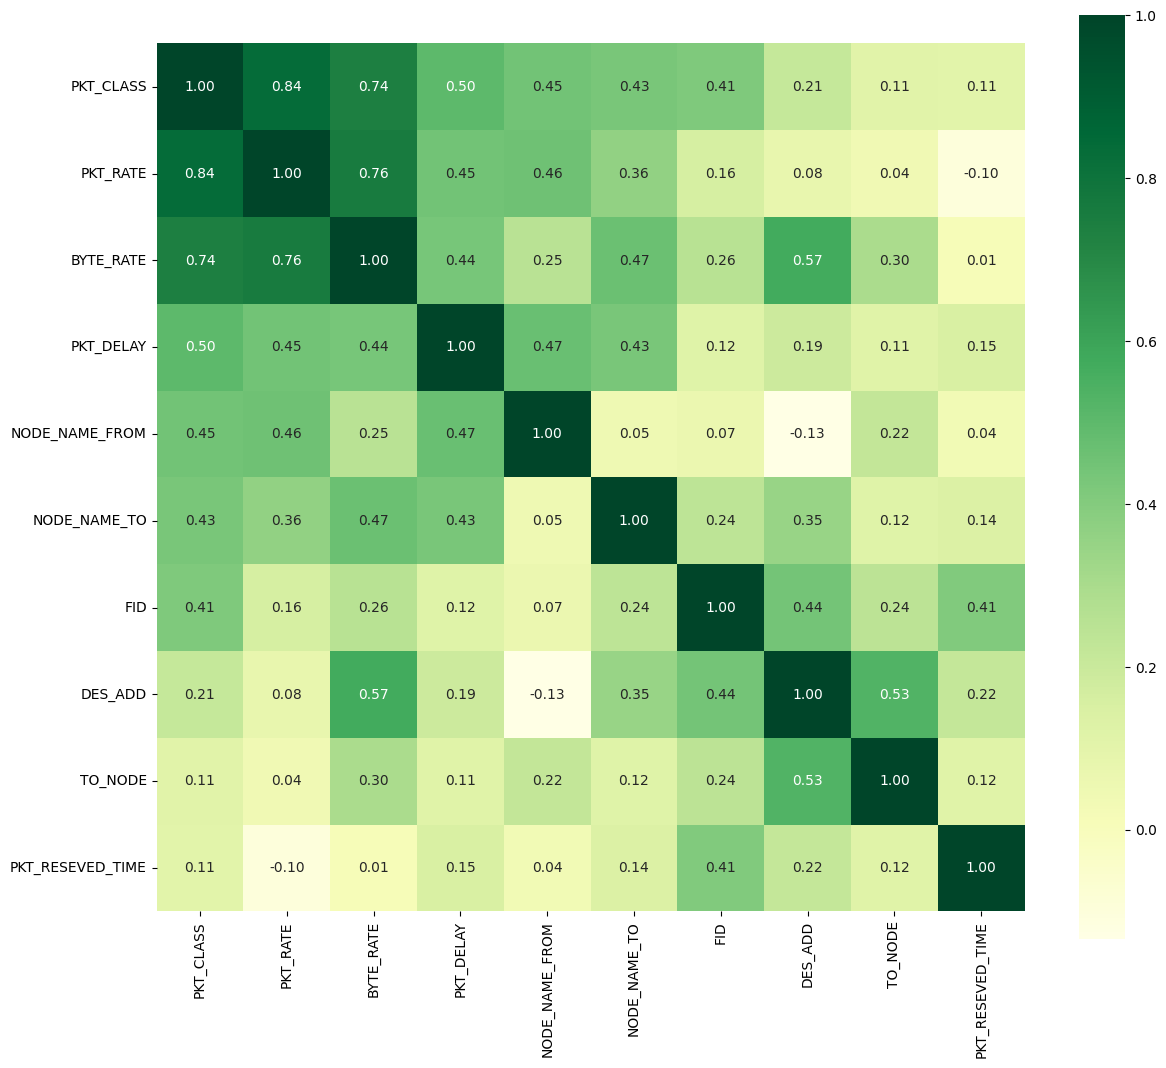

In [10]:
corrmat = data.corr()
k = 10
cols = corrmat.nlargest(k, 'PKT_CLASS')['PKT_CLASS'].index
cm = np.corrcoef(data[cols].values.T)
plt.figure(figsize=(14,12))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap='YlGn', linecolor='white')

In [11]:
high_corr_features=corrmat.index[abs(corrmat['PKT_CLASS'])>0.40]
print(f'Highly Corrolated Features:\n', high_corr_features, '\n')
print(f'No. of Highly Corrolated Features:', len(high_corr_features))

Highly Corrolated Features:
 Index(['FID', 'NODE_NAME_FROM', 'NODE_NAME_TO', 'PKT_RATE', 'BYTE_RATE',
       'PKT_DELAY', 'LAST_PKT_RESEVED', 'PKT_CLASS'],
      dtype='object') 

No. of Highly Corrolated Features: 8


In [12]:
X = data.drop('PKT_CLASS',axis=1)
Y = data['PKT_CLASS']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)


In [13]:
l=len(X)
print(l)


20079


In [14]:
print(X)
print(Y)

       SRC_ADD  DES_ADD  PKT_ID  FROM_NODE  TO_NODE  PKT_TYPE  PKT_SIZE  FID  \
0         3.00    24.30  389693         21       23         3      1540    4   
1        15.00    24.15  201196         23       24         3      1540   16   
2        24.15    15.00   61905         23       22         0        55   16   
3        24.90     9.00  443135         23       21         0        55   10   
4        24.80     8.00  157335         23       21         0        55    9   
...        ...      ...     ...        ...      ...       ...       ...  ...   
20074    24.10     1.00  450842         23       21         0        55    2   
20075    24.90     9.00  541205         23       21         0        55   10   
20076     4.10    24.24  622218         21       23         1      1000   25   
20077    24.80     8.00  250544         23       21         0        55    9   
20078    16.20    24.58    5330         22       23         1      1500   37   

       SEQ_NUMBER  NUMBER_OF_PKT  ...  

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)


In [16]:
model = SVC(kernel='sigmoid', gamma='auto')
model.fit(X_train, Y_train)



SVC(gamma='auto', kernel='sigmoid')

In [17]:
Y_pred=model.predict(X_test)


In [18]:
print((accuracy_score(Y_pred,Y_test))*100,"%")


96.81274900398407 %


In [19]:
model1 = KNeighborsClassifier(n_neighbors=1)
model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [20]:
Y_pred1=model1.predict(X_test)

In [21]:
print((accuracy_score(Y_pred1,Y_test))*100,"%")

96.88745019920319 %


In [22]:
model2 = GaussianNB()
model2.fit(X_train,Y_train,sample_weight=None)


GaussianNB()

In [23]:
Y_pred2=model2.predict(X_test)

In [24]:
print((accuracy_score(Y_pred2,Y_test))*100,"%")

96.73804780876493 %


In [25]:
train_x,val_x,train_y,val_y=train_test_split(X_train,Y_train,stratify=Y_train,test_size=0.2,random_state=0)



In [26]:
print(X_train.shape,X_test.shape)



(16063, 26) (4016, 26)


In [27]:
columns=['SRC_ADD','DES_ADD','PKT_ID','FROM_NODE','TO_NODE','PKT_TYPE','PKT_SIZE','FLAGS','FID','SEQ_NUMBER','NUMBER_OF_PKT','NUMBER_OF_BYTE','NODE_NAME_FROM','NODE_NAME_TO',' PKT_IN','PKT_OUT','PKT_R','PKT_DELAY_NODE','PKT_RATE','BYTE_RATE','PKT_AVG_SIZE','UTILIZATION','PKT_DELAY','PKT_SEND_TIME','PKT_RESEVED_TIME','FIRST_PKT_SENT',' LAST_PKT_RESEVED','PKT_CLASS']


In [28]:
model=SVC(kernel='sigmoid',gamma='auto')
model.fit(X_train,Y_train)
y_val_pred=model.predict(val_x)
y_val_pred=pd.DataFrame(y_val_pred)
y_test_pred=model.predict(X_test)
y_test_pred=pd.DataFrame(y_test_pred)


In [29]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(X_train,Y_train)
y_val_pred1=model1.predict(val_x)
y_val_pred1=pd.DataFrame(y_val_pred1)
y_test_pred1=model1.predict(X_test)
y_test_pred1=pd.DataFrame(y_test_pred1)



In [30]:
model2 = GaussianNB()
model2.fit(X_train,Y_train)
y_val_pred2=model2.predict(val_x)
y_val_pred2=pd.DataFrame(y_val_pred2)
y_test_pred2=model2.predict(X_test)
y_test_pred2=pd.DataFrame(y_test_pred2)



In [31]:
val_input=pd.concat([pd.DataFrame(val_x),y_val_pred,y_val_pred1,y_val_pred2],axis=1)
test_input=pd.concat([pd.DataFrame(X_test),y_test_pred,y_test_pred1,y_test_pred2],axis=1)



In [32]:
model3=RandomForestClassifier(n_estimators=500)
model3.fit(val_input,val_y)




RandomForestClassifier(n_estimators=500)

In [33]:
print(model3.score(test_input,Y_test)*100,"%")



98.28187250996015 %
